# W207 Final Project, Summer 2018
# Understanding Gun Violence
### Rory Liu, Kathryn Plath, Andrea Sy, David He

## Introduction
The subject of gun violence has captured national attention for the past few years. In order to dig deeper and get a better understanding of this issue, we decided to conduct an independent analysis with the dataset provided by Kaggle and Gun Violence Archive. 

Our final project aims to explore the relationship between certain features (related to gun violence, demographics, socioeconomic factors, NRA ratings, etc), number of incidents, number of casualties, and likelihood of mass events.

In this project, the steps we took are as follows:
1. Imported the necessary packages to explore and model the data
2. Loaded and cleaned the data
    - Parsed dates, incident types, and participant characteristics
    - Removed incomplete and non-violent incidents
    - Created dummy variables for incident categories
3. Merged in external data
    - NRA ratings
    - Political leaning
    - District populations and demographics indicators
4. Visual-Based Exploratory Data Analysis
5. Machine Learning Algorithms
    - Linear Regression
    - Decision Tree
    - Random Forest
    - Principle Component Analysis
    - Logistic Regression

## Data Cleaning and Processing

#### Establish overview of data
Our First step is to import the packages we need to use for the project, and load in the data

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline


#!pip install msgpack
#!pip install plotly
#!brew install graphviz
#!pip install pydotplus

# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, maxabs_scale, StandardScaler, RobustScaler, Normalizer
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import clear_output, display, HTML

C:\Users\kplat\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\kplat\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Load the data and parsing date column as date
df = pd.read_csv("gun_violence_data.csv",parse_dates=["date"])

# Print an overview of all available data columns
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null datetime64[ns]
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude            

In [3]:
# Print the first few rows of data
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [4]:
df['year']=df['date'].dt.year
df.groupby(['year']).agg({'n_killed': 'sum', 'n_injured': 'sum','incident_id':'count'}).reset_index()

,year,n_killed,n_injured,incident_id
0,2013,317,979,278
1,2014,12557,23002,51854
2,2015,13484,26967,53579
3,2016,15066,30580,58763
4,2017,15511,30703,61401
5,2018,3533,6171,13802


For the above overview, we find that the data columns are in their expected type, so we do not need to retype any variable. However, we do notice the following issues that requires additioanl cleaning and processing:
1. There are a lot of null values across most variables. In our model building, we will need to handle blanks by either dropping the rows, or imputing with median / mean.
 
2. Incident_characteristics variable in cannot be used in it's current format, since it lists all characteristics that an incident satisfies in a single varaible. We need to parse the unique types out, and create binary flags for the key ones.

3. The dataset contains participants information (both suspect and victim), but also in a format that requires additional parsing to be useful.

4. We noticed that we have very iew incidents in 2013 and 2018, compared to other years. We decide to drop the 2013 and 2018 data, just so that we can compare apples to apples


#### 1. Setting up incident types
We start our cleaning by first parsing the incident characteristics, and establish binary flags for incident types.

In [5]:
#parsing out unique incident characteristics in the data
unique_types = []
for n in df["incident_characteristics"]:
    row_list = str(n).split("|")
    for x in row_list:
        if x not in unique_types and x != "":
            unique_types.append(x)
print('# of unique incident types in data: ',len(unique_types)) 
unique_types = sorted(unique_types)
unique_types

# of unique incident types in data:  110


['ATF/LE Confiscation/Raid/Arrest',
 'Accidental Shooting',
 'Accidental Shooting - Death',
 'Accidental Shooting - Injury',
 'Accidental Shooting at a Business',
 'Accidental/Negligent Discharge',
 'Animal shot/killed',
 'Armed robbery with injury/death and/or evidence of DGU found',
 'Assault weapon (AR-15, AK-47, and ALL variants defined by law enforcement)',
 'Attempted Murder/Suicide (one variable unsuccessful)',
 'BB/Pellet/Replica gun',
 'Bar/club incident - in or around establishment',
 'Brandishing/flourishing/open carry/lost/found',
 'Car-jacking',
 'Child Involved Incident',
 'Child injured (not child shooter)',
 'Child injured by child',
 'Child injured self',
 'Child killed (not child shooter)',
 'Child killed by child',
 'Child killed self',
 'Child picked up & fired gun',
 'Child with gun - no shots fired',
 'Cleaning gun',
 'Concealed Carry License - Perpetrator',
 'Concealed Carry License - Victim',
 'Criminal act with stolen gun',
 'Defensive Use',
 'Defensive Use - C

We found that there are 110 unique types, many of which we do not consider real "gun violence", including "gun buy back action", "Non-Aggression Incidents", etc. Because we are concerned with understanding gun violence, we will remove these non-violent incidents directly. In addition, some of characteristics also do not suggest violence on its own. For example, we do not consider 'suicide' to be a violent incident, unless it happens in an incidents where aggression to others also occured. Therefore, we decide to only keep incidents where at least one tag suggests that violence have occured.

In [6]:
## Direct exclusions of non-violent even types
direct_excluded_types=['Gun buy back action',
                       "LOCKDOWN/ALERT ONLY: No GV Incident Occurred Onsite",
                       "ATF/LE Confiscation/Raid/Arrest",
                       'Implied Weapon',
                       'Non-Aggression Incident',
                       'Non-Shooting Incident',]
df["incident_characteristics"].fillna("Not Available", inplace=True)
for n in direct_excluded_types:
    df=df[df.incident_characteristics.str.contains(n) == False]

## Conditional Exclusions
# write down a list of what to not delete. And then delete rows, which does not contain something from the list.
do_not_delete = [ 
 'Accidental Shooting',
 'Accidental Shooting - Death',
 'Accidental Shooting - Injury',
 'Accidental Shooting at a Business',
 'Accidental/Negligent Discharge',
 'Armed robbery with injury/death and/or evidence of DGU found',
 'Attempted Murder/Suicide (one variable unsuccessful)',
 'Bar/club incident - in or around establishment',
 'Car-jacking',
 'Child Involved Incident',
 'Child injured (not child shooter)',
 'Child injured by child',
 'Child injured self',
 'Child killed (not child shooter)',
 'Child killed by child',
 'Child killed self',
 'Child picked up & fired gun',
 'Child with gun - no shots fired',
 'Cleaning gun',
 'Criminal act with stolen gun',
 'Defensive Use',
 'Defensive Use - Crime occurs, victim shoots subject/suspect/perpetrator',
 'Defensive Use - Good Samaritan/Third Party',
 'Defensive Use - Shots fired, no injury/death',
 'Defensive Use - Stand Your Ground/Castle Doctrine established',
 'Defensive Use - Victim stops crime',
 'Defensive Use - WITHOUT a gun',
 'Defensive use - No shots fired',
 'Domestic Violence',
 'Drive-by (car to street, car to car)',
 'Drug involvement',
 'Gang involvement',
 'Ghost gun',
 'Gun at school, no death/injury - elementary/secondary school',
 'Gun at school, no death/injury - university/college',
 'Gun range/gun shop/gun show shooting',
 'Gun shop robbery or burglary',
 'Gun(s) stolen from owner',
 'Guns stolen from law enforcement',
 'Hate crime',
 'Home Invasion',
 'Home Invasion - No death or injury',
 'Home Invasion - Resident injured',
 'Home Invasion - Resident killed',
 'Home Invasion - subject/suspect/perpetrator injured',
 'Home Invasion - subject/suspect/perpetrator killed',
 'House party',
 'Hunting accident',
 'Institution/Group/Business',
 'Kidnapping/abductions/hostage',
 'Mass Murder (4+ deceased victims excluding the subject/suspect/perpetrator , one location)',
 'Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)',
 'Mistaken ID (thought it was an intruder/threat, was friend/family)',
 'Murder/Suicide',
 'NAV',
 'Officer Involved Incident',
 'Officer Involved Incident - Weapon involved but no shots fired',
 'Officer Involved Shooting - Accidental discharge - no injury required',
 'Officer Involved Shooting - Bystander killed',
 'Officer Involved Shooting - Bystander shot',
 'Officer Involved Shooting - Officer killed',
 'Officer Involved Shooting - Officer shot',
 'Officer Involved Shooting - Shots fired, no injury',
 'Officer Involved Shooting - subject/suspect/perpetrator killed',
 'Officer Involved Shooting - subject/suspect/perpetrator shot',
 'Officer Involved Shooting - subject/suspect/perpetrator suicide at standoff',
 'Officer Involved Shooting - subject/suspect/perpetrator suicide by cop',
 'Officer Involved Shooting - subject/suspect/perpetrator surrender at standoff',
 'Officer Involved Shooting - subject/suspect/perpetrator unarmed',
 'Pistol-whipping',
 'Playing with gun',
 'Police Targeted',
 'Political Violence',
 'Road rage',
 'School Incident',
 'School Shooting - elementary/secondary school',
 'School Shooting - university/college',
 'Self-Inflicted (not suicide or suicide attempt - NO PERP)',
 'Sex crime involving firearm',
 'Shootout (where VENN diagram of shooters and victims overlap)',
 'Shot - Dead (murder, accidental, suicide)',
 'Shot - Wounded/Injured',
 'Shots Fired - No Injuries',
 'Spree Shooting (multiple victims, multiple locations)',
 'Stolen/Illegally owned gun{s} recovered during arrest/warrant',
 'Terrorism Involvement',
 'Thought gun was unloaded',
 'Under the influence of alcohol or drugs (only applies to the subject/suspect/perpetrator )',
 'Workplace shooting (disgruntled employee)',
]

df=df[df.incident_characteristics.str.contains('|'.join(do_not_delete)) == True]

/Users/rory/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:106: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


The last step in parsing incident characteristics is to set up binary flags. The exisitng characteristics are very granular, so we decided to group them into higher-level types and create biniary variables for them. The types that we created are: 
- Accidents
- Child
- Defense
- Domestic Violence
- Drug / Alcohol
- Fight
- Gang
- Hate Crime
- Hostage
- Mass
- Police
- Political_Violence
- Robbery
- School
- Sex crimes
- Social gathering
- Terrorism

In [7]:
## Creating some binary interesting binary columns based on the characteristics
df["Accidents"]=df.incident_characteristics.str.contains('Accidental|Cleaning gun|Hunting accident|\
                                                          Playing with gun|Thought gun was unloaded|Mistaken ID|Self-Inflicted')*1 
print("# of accidents",df["Accidents"].sum())

df["Child"]=df.incident_characteristics.str.contains('Child')*1
print("# of incidents that are children related",df['Child'].sum())

df["Defense"]=df.incident_characteristics.str.contains('Defensive')*1
print("# of incidents that are defensive",df['Defense'].sum())

df["Domestic_Violence"]=df.incident_characteristics.str.contains('Domestic Violence')*1
print("# of incidents that are domestic violence",df['Domestic_Violence'].sum())

df["Drug_Alcohol"]=df.incident_characteristics.str.contains('Drug|alcohol')*1
print("# of incidents that are related to drug / alcohol",df['Drug_Alcohol'].sum())

df["Fight"]=df.incident_characteristics.str.contains('Drive-by|Gun range|Pistol-whipping|\
                                                     Road rage|Shootout|Workplace')*1
print("# of incidents that are related to fights",df['Fight'].sum())

df['Gang']=df.incident_characteristics.str.contains('Gang')*1
print("# of incidents that are gang related",df['Gang'].sum())

df['Ghost_gun']=df.incident_characteristics.str.contains('Ghost')*1
print("# of incidents that are has ghost guns",df['Ghost_gun'].sum())

df['Hate_crime']=df.incident_characteristics.str.contains('Hate')*1
print("# of incidents that are hate crime related",df['Hate_crime'].sum())

df['Hostage']=df.incident_characteristics.str.contains('Kidnapping')*1
print("# of incidents that are hostage related",df['Hostage'].sum())

df["Mass"]=df.incident_characteristics.str.contains('Mass|Spree')*1
print("# of mass incidents",df['Mass'].sum())

df["Murder"]=df.incident_characteristics.str.contains('Attempted|Murder\Suicide')*1
print("# of murder incidents",df['Murder'].sum())

df["Police"]=df.incident_characteristics.str.contains('Officer|Police')*1
print("# of incidents that are police related",df['Police'].sum())

df["Political_Violence"]=df.incident_characteristics.str.contains('Political Violence')*1
print("# of political violence incidents",df['Political_Violence'].sum())

df["Robbery"]=df.incident_characteristics.str.contains('robbery|Car-jacking|Home Invasion')*1
print("# of incidents that are robbery related",df['Robbery'].sum())

df['School']=df.incident_characteristics.str.contains('School|school')*1
print("# of incidents that are school related",df['School'].sum())

df['Sex_crime']=df.incident_characteristics.str.contains('Sex crime')*1
print("# of incidents that are sex crimes",df['Sex_crime'].sum())

df['Social_gathering']=df.incident_characteristics.str.contains('Bar|party')*1
print("# of incidents that are social gathering related",df['Social_gathering'].sum())

df["terrorism"]=df.incident_characteristics.str.contains('Terrorism Involvement')*1
print("# of terrorism-related incidents",df['terrorism'].sum())


# of accidents 6108
# of incidents that are children related 1559
# of incidents that are defensive 6202
# of incidents that are domestic violence 8899
# of incidents that are related to drug / alcohol 6937
# of incidents that are related to fights 16007
# of incidents that are gang related 4530
# of incidents that are has ghost guns 11
# of incidents that are hate crime related 79
# of incidents that are hostage related 1157
# of mass incidents 1841
# of murder incidents 456
# of incidents that are police related 13256
# of political violence incidents 7
# of incidents that are robbery related 23782
# of incidents that are school related 611
# of incidents that are sex crimes 223
# of incidents that are social gathering related 4898
# of terrorism-related incidents 9


#### 2. Parsing participants demographics

Next we proceed to parse participants demographics, and set up variables for the age and gender of suspects and victims

In [8]:
import re
# Add columns of each of possible combination of participant_age_group, participant_gender and participant_type
for col1 in ('Adult','Teen', 'Child'):
    for col2 in ('Male','Female'):
        for col3 in ('Victim','SubjectSuspect'):
            col_name = ''.join([col1, '_', col2, '_', col3])
            #print(col_name)
            #add new column
            df[col_name] = 0
# print out existing columns
#print(df.dtypes)

#define function to clean a string - split it into list like:
# 0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+||5::Adult 18+
# to
#['Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult']
def splitstr(s):
    s = re.sub(r'[\d]::', '', s)
    s = re.sub(r'[ \d]', '', s)
    s = re.sub(r'[+-:]', '', s)
    s = re.sub('\|\|', '|', s) # some entries uses | instead of ||, so it need to be replaced first
    s = s.split('|')
    return s

# so for every row, split the string by || and count results - if the length of lists does not match - remove row
# this might take some time..
todrop = [] #keep list of rows to be dropped
print("Row by row execution started.")
for index, row in df.iterrows():
    #track progress
    if index % 10000 == 0:
        print("Progress index: {}".format(index))
    
    s0 = row['participant_age_group']
    s1 = row['participant_gender']
    s2 = row['participant_type']
    
    # if any data is nan - skip row
    if (pd.isnull(s0) or pd.isnull(s1) or pd.isnull(s2)):
        todrop.append(index)
        continue
    
    s0 = splitstr(s0)
    s1 = splitstr(s1)
    s2 = splitstr(s2)
    
    # remove row if count of participants in each column does not match
    if (not len(s0)==len(s1)==len(s2)) or (len(s0)*len(s1)*len(s2)==0):
        todrop.append(index)
        continue
    # actually adding data to the columns
    for i in range(0, len(s0)):
        if s1[i] != 'Malefemale': #because there is one more wrong entry...
            col_name = ''.join([s0[i], '_', s1[i], '_', s2[i]])
            df.loc[index, col_name] += 1
        else:
            todrop.append(index)
#drop rows
df.drop(todrop, inplace=True)
# drop columns
df = df.drop(['participant_age_group', 'participant_gender', 'participant_type'], axis=1)

Row by row execution started.
Progress index: 0
Progress index: 10000
Progress index: 20000
Progress index: 30000
Progress index: 40000
Progress index: 50000
Progress index: 60000
Progress index: 70000
Progress index: 80000
Progress index: 90000
Progress index: 100000
Progress index: 140000
Progress index: 150000
Progress index: 160000
Progress index: 180000
Progress index: 190000
Progress index: 210000
Progress index: 220000


#### 3. Dropping 2013 & 2018 data

In [9]:
df = df[(df['year']>2013) & (df['year']<2018) ]

Now we have finished cleaning and parsing the existing dataset. 
Furthermore, we have identified some additional piece of information that will largely help us build well-rounded models. These include:
- Demographics information by state, and by congressional district (including population, population density, average income, education, etc.)
- NRA rating for US Senators and Representatives in state & congressional district
- General political leaning of the state (based on 2016 election)

These information will help us understand how (and whether) political and demographic factors impact gun violence. We proceed to merge in these information from external datasets

#### 4. Additional data merging - NRA Ratings

In [10]:
# These are the current members of congress
current_leg = pd.read_csv('legislators-current.csv')
current_leg['full_name'] = [str(current_leg['first_name'][i] + " " + current_leg['last_name'][i]) for i in range(0, len(current_leg))]

# The grades from the NRA. This file has way more information than we need (grades for general and primary election candidates,
# and does not indicate who won), file from Everytown
nra_grades = pd.read_csv('nra-grades.csv', encoding = 'latin1')

# Use the current_leg and nra_grades dataframes together to come up with a grade for the incident. 
df['sen_grade'] = np.nan
df['rep_grade'] = np.nan

# nra_grades uses state abbreviations and current_leg uses names, so need to convert between them
state_abbr = {'Alaska': 'AK', 'Alabama': 'AL', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
             'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
             'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
             'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
             'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 
             'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
             'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
             'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
             'Utah': 'UT', 'Vermont':'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
             'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'}
# Move the letter grades to a numeric scale. The grades include A+ and F- so it ranges from -0.3 to 4.3. There are also ? grades
# in the data, so need to assign them a value, but also ignore them in calculating a region's grade
grade_conv = {"A+": 4.3, "A": 4, "A-": 3.7, "AQ": 3.7, "B+": 3.3, "B": 3, "B-": 2.7, "C+": 2.3, "C": 2, "C-": 1.7, "D+": 1.3, 
              "D": 1, "D-": 0.7, "F+": 0.3, "F": 0, "F-": -0.3, "?": 0}

# Loop through each event and add rep_grade and senate grade
for incident in range(0, len(df)):
    state =  state_abbr[df['state'].iloc[incident]]
    if state != 'DC': # ignore DC because it does not have senators associated with it
        senators = list(current_leg['full_name'].loc[current_leg['state'] == state].loc[current_leg['type'] == "sen"])
        senate_grades = []
        for senator in senators:
            senator_nra_grades = list(nra_grades['grade'].loc[nra_grades["full_name"] == senator].loc[nra_grades["race"] == "General"])
            if len(senator_nra_grades) > 1:
                senate_grades.append(senator_nra_grades[-1])
            elif senator_nra_grades == []:
                senate_grades.append("?")
            else:
                senate_grades.append(senator_nra_grades)
        length = 0 # need to count how many values there are and exclude empty or ? values
        for value in range(0, len(senate_grades)):
            if senate_grades[value] != "?":
                length += 1
        if length > 0: # taking the average of the senator's grades for the state
            df['sen_grade'].iloc[incident] = (grade_conv[senate_grades[0][0][0]] + grade_conv[senate_grades[1][0][0]])/length
        else:
            df['sen_grade'].iloc[incident] = np.nan
    else:
        df['sen_grade'].iloc[incident] = np.nan
    district = df['congressional_district'].iloc[incident] # moving on house of representatives
#     print(district)
    rep_name = list(current_leg['full_name'].loc[current_leg['state'] == state].loc[current_leg['district'] == district])
#     print(rep_name)
    if rep_name == []:
        df['rep_grade'].iloc[incident] = np.nan
    else:
        rep_grade = list(nra_grades['grade'].loc[nra_grades["full_name"] == rep_name[0]].loc[nra_grades["race"] == "General"])
#         print(list(nra_grades['grade'].loc[nra_grades["full_name"] == rep_name[0]].loc[nra_grades["race"] == "General"]))
        if len(rep_grade) > 0:
            df['rep_grade'].iloc[incident] = grade_conv[rep_grade[-1]]   
        else:
            df['rep_grade'].iloc[incident] = np.nan
        

/Users/rory/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Here we have merged in the NRA rating and created 2 additional data columns "sen_grade" and "rep_grade". For these 2 variables, the higher the grade, the more gun friendly the state / district. 

We will merge in district information later when we collapse the data into district level. Now that we finished cleaning and processing our data, we write out our final dataset as a csv, for easier access.

We also set up the test and train data, to prepare for machine learning later.

In [79]:
df.reset_index(drop = True, inplace = True)

# Split into test and training sets
print(len(df))

# Need to shuffle the data because it is ordered - IF YOU RERUN THIS IT WILL CHANGE THE TRAINING AND TEST SETS!
df = df.sample(frac=1).reset_index(drop=True)
# Write file to csv
df.to_csv("gun_violence_8,2.csv")

train_data = df[:85000]
test_data = df[85000:]

## Check that the shapes look right.
print(train_data.shape, test_data.shape)

# Write file to csv
train_data.to_csv("gun_violence_train.csv")
test_data.to_csv("gun_violence_test.csv")


98312
(85000, 60) (13312, 60)


In [4]:
# Reading the files back in
train_data = pd.read_csv("gun_violence_train.csv", parse_dates=["date"], encoding = 'latin1')
test_data = pd.read_csv("gun_violence_test.csv", parse_dates=['date'], encoding = 'latin1')
df = pd.read_csv("gun_violence_8,2.csv", parse_dates=['date'], encoding = 'latin1')
df.reset_index(drop = True, inplace = True)
train_data.reset_index(drop = True, inplace = True)
test_data.reset_index(drop = True, inplace = True)
print(train_data.shape, test_data.shape,df.shape)

C:\Users\kplat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(85000, 60) (13312, 60) (98312, 60)


## Exploratory Analysis


To gain a better understanding of the data that we wanted to use for our models, we also conducted a a high-level EDA on the gun violence data that we had just cleaned and processed. Specifically we wanted to look at gun violence activity over time, as well as gun violence and mass shootings from a more geographical perspective.

In [90]:
## Visualizing number of incidents and casualties across time
import plotly.plotly as py
import plotly.graph_objs as go
viz1 = df.groupby('date').agg({'incident_id' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'incident_id' : 'incidents'})

line1 = go.Scatter(x = viz1.date, y = viz1.incidents, name='# of Incidents', mode = "lines", marker = dict(color = '#5b6477'))
line2 = go.Scatter(x = viz1.date, y = viz1.n_killed, name="People Killed", mode = "lines", marker = dict(color = '#e08a55'))
line3 = go.Scatter(x = viz1.date, y = viz1.n_injured, name="People Injured", mode = "lines", marker = dict(color = '#a5a5a5'))

data = [line1, line2, line3]
layout = dict(height=350,title = 'Gun Violence At A Glance', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
py.iplot(fig)

One thing to note is the slight upward slope towards middle of the year, and then die down a bit for the rest of the year. It’s also worth noting the years when Obama was president were not noticeably better or worse than Trump.

In [91]:
# Dictionary to convert state names to state code, in order for plotly maps to work
statename_to_abbr = {
    # Other
    'District of Columbia': 'DC',
    
    # States
    'Alabama': 'AL',
    'Montana': 'MT',
    'Alaska': 'AK',
    'Nebraska': 'NE',
    'Arizona': 'AZ',
    'Nevada': 'NV',
    'Arkansas': 'AR',
    'New Hampshire': 'NH',
    'California': 'CA',
    'New Jersey': 'NJ',
    'Colorado': 'CO',
    'New Mexico': 'NM',
    'Connecticut': 'CT',
    'New York': 'NY',
    'Delaware': 'DE',
    'North Carolina': 'NC',
    'Florida': 'FL',
    'North Dakota': 'ND',
    'Georgia': 'GA',
    'Ohio': 'OH',
    'Hawaii': 'HI',
    'Oklahoma': 'OK',
    'Idaho': 'ID',
    'Oregon': 'OR',
    'Illinois': 'IL',
    'Pennsylvania': 'PA',
    'Indiana': 'IN',
    'Rhode Island': 'RI',
    'Iowa': 'IA',
    'South Carolina': 'SC',
    'Kansas': 'KS',
    'South Dakota': 'SD',
    'Kentucky': 'KY',
    'Tennessee': 'TN',
    'Louisiana': 'LA',
    'Texas': 'TX',
    'Maine': 'ME',
    'Utah': 'UT',
    'Maryland': 'MD',
    'Vermont': 'VT',
    'Massachusetts': 'MA',
    'Virginia': 'VA',
    'Michigan': 'MI',
    'Washington': 'WA',
    'Minnesota': 'MN',
    'West Virginia': 'WV',
    'Mississippi': 'MS',
    'Wisconsin': 'WI',
    'Missouri': 'MO',
    'Wyoming': 'WY',
}

In [92]:
# Gun Violence in USA EDA interactive map
df_plotly = df.groupby("state").size().reset_index(name="counts")

states = df_plotly["state"].tolist()
values = df_plotly["counts"].astype("float").tolist()

state_code = list(map(statename_to_abbr.get, states))


data = [dict(
        type='choropleth',
        autocolorscale = True,
        locations = state_code,
        z = values,
        locationmode = 'USA-states'
        ) ]

layout = dict(title = 'Gun Violence in the USA, 2013-2018', geo = dict(scope='usa'))
    
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='d3-cloropleth-map' )

In [93]:
# Mass Shooting in USA EDA interactive map
df_plotly2_df = df
df_plotly2_df["Mass Shooting"] = (df_plotly2_df["n_killed"] + df_plotly2_df["n_injured"]) >= 3
df_plotly2 = df_plotly2_df.groupby(["state","Mass Shooting"]).size().reset_index(name="counts")
plotly2 = df_plotly2[df_plotly2["Mass Shooting"] == True]

states2 = plotly2["state"].tolist()
values2 = plotly2["counts"].astype("float").tolist()

state_code2 = list(map(statename_to_abbr.get, states2))


data = [dict(
        type='choropleth',
        autocolorscale = True,
        locations = state_code2,
        z = values2,
        locationmode = 'USA-states'
        ) ]

layout = dict(title = 'Mass Shootings in the USA, 2013-2018', geo = dict(scope='usa'))
    
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='d3-cloropleth-map' )

Based on the heat maps that we were able to render, you can see that there are high concentrations of gun violence and mass shootings in Illinois, California, Florida and Texas. It also seems like the Central/Eastern areas of America have higher concentrations of gun violence and mass shootings than if we were to head in the Western direction.

## Machine learning Model 1: Predicting incident volume

In our first modeling attempt, we aim to uncover the relationship between annual incident volume and various political and demographic factors. In order to do this, we first collapse the data by congressional district by year, so that each row is a unique distrcit for each year.

In [96]:
## Collapsing data by congressional district by year
district_data=df.groupby(['congressional_district','state','year']).agg({'n_killed': 'sum', 
                                                                 'n_injured': 'sum',
                                                                 'rep_grade':'mean',
                                                                 'sen_grade': ['mean','count']}).reset_index()
district_data.columns = district_data.columns.droplevel(1)
district_data.columns = ['Congressional_district','State',"Year",'Total_n_killed','Total_n_injured','rep_grade','sen_grade','n_incidents']
district_data.head()

,Congressional_district,State,Year,Total_n_killed,Total_n_injured,rep_grade,sen_grade,n_incidents
0,0.0,Delaware,2016,1,1,0.0,0.0,2
1,0.0,Delaware,2017,9,50,0.0,0.0,55
2,0.0,Montana,2017,7,11,3.7,4.0,29
3,0.0,North Dakota,2017,1,7,4.0,4.0,14
4,0.0,South Dakota,2016,0,1,4.0,4.0,1


To get a first look at the relationship between NRA rating (proxy for gun control policy), we look at a scatterplot of rep_grade and annual incident volume by district

Text(0.5,1,'Relationship between rep_grade and number of incidents by year')

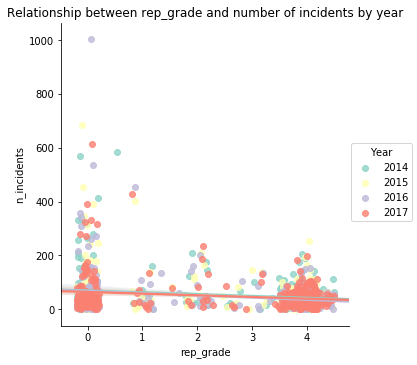

In [97]:
sns.lmplot(x='rep_grade', y='n_incidents',hue='Year',x_jitter=0.2,data=district_data,palette="Set3")
ax = plt.gca()
ax.set_title("Relationship between rep_grade and number of incidents by year")

from the chart above, we see that there seems to be a minor negative relationship between the NRA rating and gun incidents, which would suggest that gun friendly district are slightly less likely to have many gun incidents. This initial finding is rather surprising, and we suspect that the relationship may be influenced by population density of a district.

As mentioned in our data processing section, we proceed to merge in various demographics factors from external data sources

In [98]:
# Group states into red and blue - based on 2016 election
blue = ['California','Colorado','Connecticut','Delaware','Hawaii','Illinois','Maine','Maryland','Massachusetts',
        'Minnesota','Nevada','New Hampshire','New Jersey','New Mexico','New York','Oregon','Rhode Island','Vermont',
        'Virginia','Washington','District of Columbia']
district_data['Blue_state']=district_data.State.str.contains('|'.join(blue))*1

# mapping in district population by merging in population file
district_data['Congressional_district']=district_data['Congressional_district'].astype(int)
district_data['State_District'] =  district_data["State"] + district_data['Congressional_district'].map(str) 
population=pd.read_excel('Population_by_district.xlsx')
population=population[['State_District','TOTPOP_CY','PCI_CY','POPDENS_CY',
                       'MALES_CY','BACHDEG_CY','HSGRAD_CY','HINC0_CY']]
district_data = pd.merge(district_data, population, on = 'State_District')
district_data['Pct_Male']=district_data['MALES_CY']/district_data['TOTPOP_CY']
district_data['Pct_HSGRAD']=district_data['HSGRAD_CY']/district_data['TOTPOP_CY']
district_data['Pct_BACH']=district_data['BACHDEG_CY']/district_data['TOTPOP_CY']
district_data.columns = ['Congressional_district','State',"Year",'Total_n_killed',
                         'Total_n_injured','rep_grade','sen_grade','n_incidents','Blue_state',
                         'State_District','Total_Population',
                         'Per_Capita_Income','Population_Density','Male_Population',
                         'Bach_Degree','HS_Degree','Income15k_HH','Pct_Male','Pct_HSGRAD','Pct_BACH']
district_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1648 entries, 0 to 1647
Data columns (total 20 columns):
Congressional_district    1648 non-null int64
State                     1648 non-null object
Year                      1648 non-null int64
Total_n_killed            1648 non-null int64
Total_n_injured           1648 non-null int64
rep_grade                 1428 non-null float64
sen_grade                 1568 non-null float64
n_incidents               1648 non-null int64
Blue_state                1648 non-null int64
State_District            1648 non-null object
Total_Population          1648 non-null int64
Per_Capita_Income         1648 non-null int64
Population_Density        1648 non-null float64
Male_Population           1648 non-null int64
Bach_Degree               1648 non-null int64
HS_Degree                 1648 non-null int64
Income15k_HH              1648 non-null int64
Pct_Male                  1648 non-null float64
Pct_HSGRAD                1648 non-null float64
Pct_BAC

Now that we have merged in the additional features, we are ready to create our test and train data and start building machine learning models

In [99]:
# Create test and train sets and scale the data
district_data = district_data.sample(frac=1).reset_index(drop=True).dropna()
district_train=district_data[:1000]
district_test=district_data[1000:]

In [100]:
# Prepare data for machine learning and scale the inputs using robust scaler
X_train_d = district_train[['sen_grade', 'rep_grade','Blue_state','Pct_Male',
                            'Income15k_HH','Per_Capita_Income','Population_Density']]
X_test_d = district_test[['sen_grade', 'rep_grade','Blue_state','Pct_Male',
                          'Income15k_HH','Per_Capita_Income','Population_Density']]
Y_train_d=district_train['n_incidents']
Y_test_d=district_test['n_incidents']
scaler = RobustScaler()
X_train_scaled_d = scaler.fit_transform(X_train_d)
X_test_scaled_d = scaler.transform(X_test_d)
X_train_d=pd.DataFrame(X_train_scaled_d, columns = X_train_d.columns)
X_test_d=pd.DataFrame(X_test_scaled_d, columns = X_test_d.columns)

Since we are predicting a continuous variable, we first attempt various linear regression models, with and without regulation

In [101]:
# Linear Regression Algorithms (with and without regulation)
LR_d = LinearRegression()
LR_d.fit(X_train_d, Y_train_d)
print ('Linear Regression Accuracy:',LR_d.score(X_test_d, Y_test_d))
Y_pred_d = LR_d.predict(X_test_d)

R_d= linear_model.Ridge (alpha = 0.1)
R_d.fit(X_train_d, Y_train_d) 
print ('Ridge regrssion Accuracy:',R_d.score(X_test_d, Y_test_d))

Lasso_d= linear_model.Lasso (alpha = 0.1)
Lasso_d.fit(X_train_d, Y_train_d) 
print ('Lasso regrssion Accuracy:',Lasso_d.score(X_test_d, Y_test_d))

print("Linear regression Coefficients:")
print(list(zip(X_train_d.columns,LR_d.coef_, )))

Linear Regression Accuracy: 0.19966260290433313
Ridge regrssion Accuracy: 0.19965441430827535
Lasso regrssion Accuracy: 0.19921224473476665
Linear regression Coefficients:
[('sen_grade', 11.984543469502636), ('rep_grade', -43.35771998855107), ('Blue_state', 8.009495957148035), ('Pct_Male', -23.522567711034036), ('Income15k_HH', 34.82318202406611), ('Per_Capita_Income', -6.261811982564786), ('Population_Density', -6.356734100643571)]


Here, we see that the prediction power of these linear regression models are all relatively low. This could imply that the relationship we have between our input and outcome variable is not linear. In addition, it's worth noting that the in accordance with our preliminary finding above, even after controlling for population density, the relationship between rep_grade and incident volume is still negative. 

Given that we potentially have a non-linear relationship at hand, we proceed to try decision-tree regressor, which would be able to model non-linearity.

Decision Tree Regression Accuracy: 0.8817632262221857
Decision Tree Regression Accuracy (max 5 layers): 0.7851664020549025


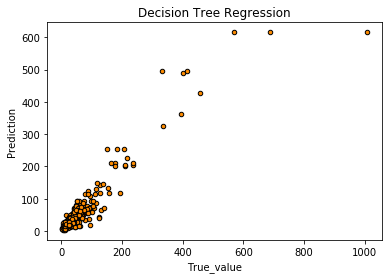

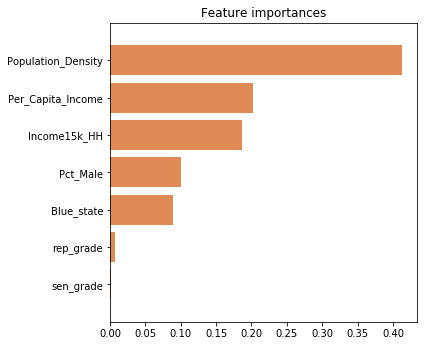

In [103]:
## Decision Tree Regression
DTR_d = DecisionTreeRegressor()
DTR_d.fit(X_train_d, Y_train_d)
print ('Decision Tree Regression Accuracy:',DTR_d.score(X_test_d, Y_test_d))

DTR_d_5 = DecisionTreeRegressor(max_depth=5)
DTR_d_5.fit(X_train_d, Y_train_d)
print ('Decision Tree Regression Accuracy (max 5 layers):',DTR_d_5.score(X_test_d, Y_test_d))

Y_pred_DTR = DTR_d.predict(X_test_d)

# Plot the results
plt.figure()
plt.scatter(Y_test_d, Y_pred_DTR, s=20, edgecolor="black", c="darkorange")
plt.xlabel("True_value")
plt.ylabel("Prediction")
plt.title("Decision Tree Regression")
plt.show()

# plot feature importance
importances_d = DTR_d.feature_importances_
indices_d = np.argsort(importances_d)
plt.figure(figsize=(5.5, 5.5))
plt.title("Feature importances")
plt.barh(range(X_train_d.shape[1]), importances_d[indices_d],
       color="#e08a55", align="center")
plt.yticks(range(X_train_d.shape[1]), X_train_d.columns)
plt.ylim([-1, X_train_d.shape[1]])
plt.show()

Here, we see that decision tree regressor performs very well, with a sore of ~0.9 without depth limitation, and a score of ~0.7 when we limit the depth of the tree to 5. This confirms our prior belief that a non-linear algorithm fits our data better. 

In terms of feature importance, we see that population density and income (both per capita income, and the prevalence of low-income households) are the most important driver of incident volume while the political leaning proxies (e.g. 'Blue_state", "sen_grade" and "rep_grade") did not turn out to be important. This suggests that to control gun violence, measure to improve general income levels and alleviate proverty may be very effective.

Now, we take a deeper look at the actual tree developed by this model

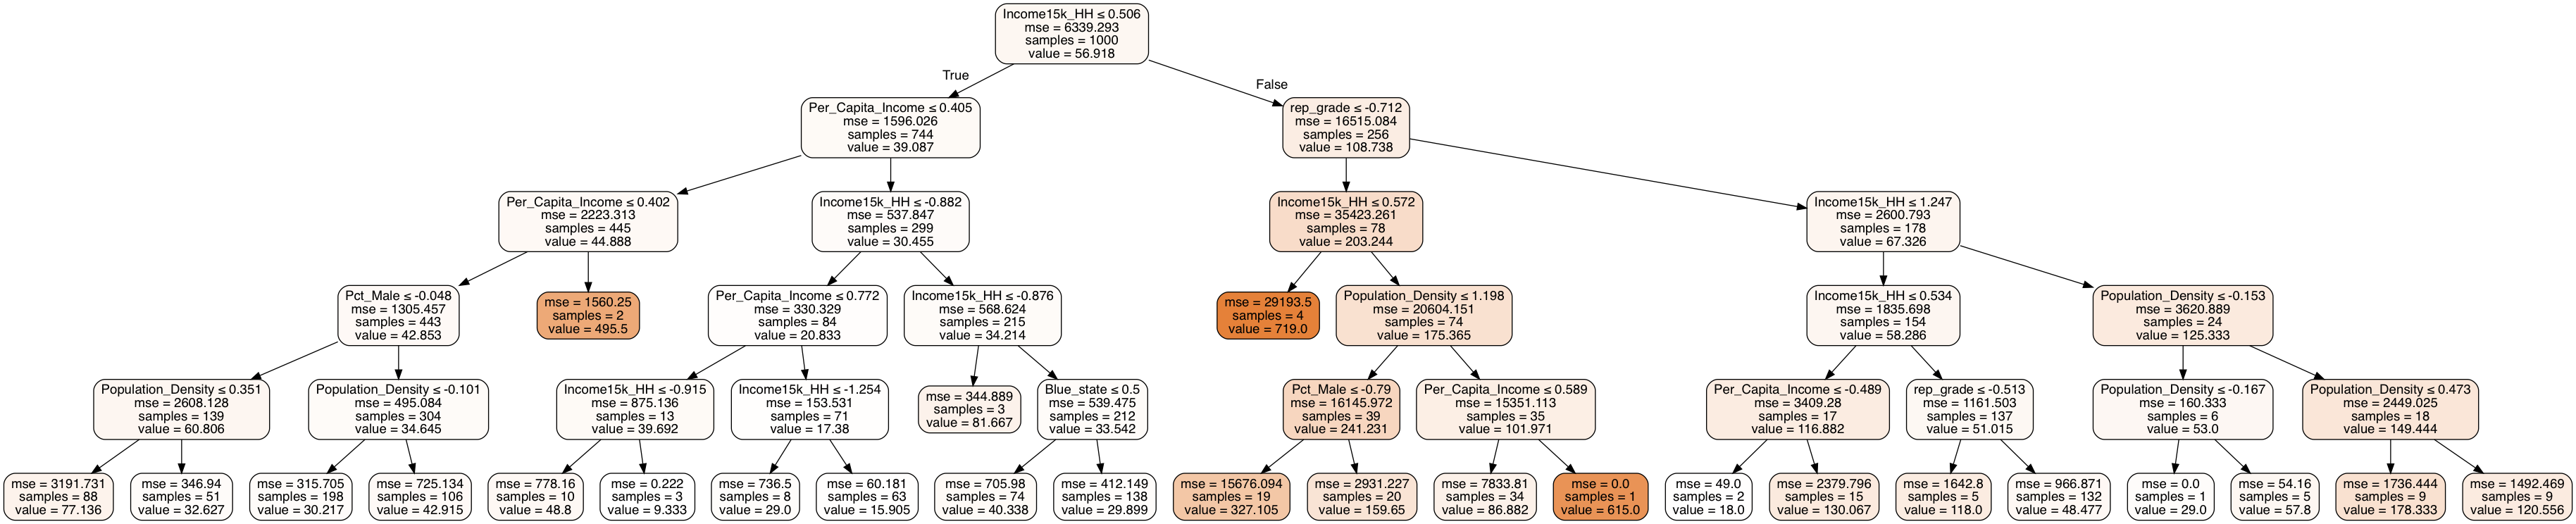

In [104]:
#!brew install graphviz
#!pip install pydotplus
dot_data = StringIO()
export_graphviz(DTR_d_5, out_file=dot_data, feature_names=X_train_d.columns,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Here we again see that many variables are use to split the tree multiple times, and there isn't a clear positive / negative relationship with incident volume for many variables. This also confirms our belief that the relatinonship is non-liner.

What's worth noting is the rep_grade node. It seems that the leaves to the left of the node (i.e. lower NRA rating) tend to predict higher incident volumes, and leaves to the right tend to predict lower incident volumes. 

Lastly, we use the random forest regressor to see if we can improve our prediction accuracy and generalizability

No handles with labels found to put in legend.


Random Forest Regression Accuracy: 0.7689263696811416


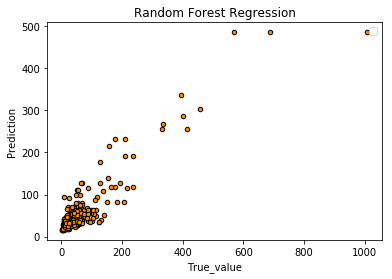

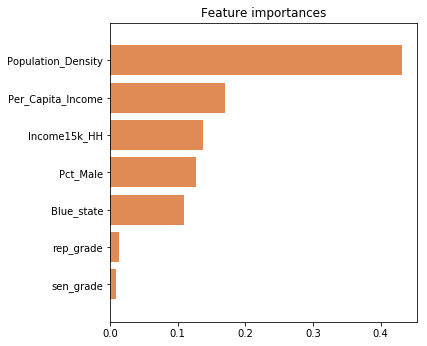

In [105]:
## Random Forest Regression

RFR_d= RandomForestRegressor(max_depth=5, random_state=0)
RFR_d.fit(X_train_d, Y_train_d)
print ('Random Forest Regression Accuracy:',RFR_d.score(X_test_d, Y_test_d))

Y_pred_RFR = RFR_d.predict(X_test_d)

# Plot the results
plt.figure()
plt.scatter(Y_test_d, Y_pred_RFR, s=20, edgecolor="black", c="darkorange")
plt.xlabel("True_value")
plt.ylabel("Prediction")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

# plot feature importance
importances_d_RFR = RFR_d.feature_importances_
indices_d_RFR = np.argsort(importances_d_RFR)
plt.figure(figsize=(5.5, 5.5))
plt.title("Feature importances")
plt.barh(range(X_train_d.shape[1]), importances_d_RFR[indices_d_RFR],
       color="#e08a55", align="center")
plt.yticks(range(X_train_d.shape[1]), X_train_d.columns)
plt.ylim([-1, X_train_d.shape[1]])
plt.show()

Here we see that our random forest regressor produced very similar results compared to the decision tree. 

## Machine learning Model 2: Predicting casualties

### Data Preprocessing

Before building out models for predicting casualties or deaths, some preprocessing needs to be done. Merging the data set, and some additional cleaning needs to be done to standardize the data to easily interpret the regressions we run for this portion of the project. One can refer to the comments within the code to see what steps have been taken to prepare the data set. 

In [111]:
# remove columns
df = df.drop(['incident_id', 'address', 'incident_url', 'source_url','incident_url_fields_missing',
              'congressional_district', 'location_description', 'participant_age', 'participant_name',
              'participant_relationship', 'sources', 'state_house_district', 'state_senate_district',
              'latitude', 'longitude', 'date', 'incident_characteristics', 'notes', 'participant_status',
              'gun_type', 'gun_stolen'], axis=1)

# drop just for now - needs to be preprocessed in the final solution
df = df.drop(['city_or_county'], axis=1)

In [112]:
# replacing NANs with mean in n_guns_involved, rep_grade, sen_grade
# A closer look should be takne to check such fillings are logically correct
df['n_guns_involved'].fillna(df['n_guns_involved'].mean(), inplace=True)
df['rep_grade'].fillna(df['rep_grade'].mean(), inplace=True)
df['sen_grade'].fillna(df['sen_grade'].mean(), inplace=True)

In [113]:
# Nomalize n_guns_involved, because it is very scattered and has big sacle
scaler = StandardScaler()
# log normalize first
df['n_guns_involved'] = np.log(df['n_guns_involved'])
scaler.fit(df['n_guns_involved'].values.reshape(-1,1).astype(float))
df['n_guns_involved'] = scaler.transform(df['n_guns_involved'].values.reshape(-1,1).astype(float))

In [114]:
# just quick preview of the data structure
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98312 entries, 0 to 98311
Data columns (total 38 columns):
state                          98312 non-null object
n_killed                       98312 non-null int64
n_injured                      98312 non-null int64
n_guns_involved                98312 non-null float64
year                           98312 non-null int64
Accidents                      98312 non-null int64
Child                          98312 non-null int64
Defense                        98312 non-null int64
Domestic_Violence              98312 non-null int64
Drug_Alcohol                   98312 non-null int64
Fight                          98312 non-null int64
Gang                           98312 non-null int64
Ghost_gun                      98312 non-null int64
Hate_crime                     98312 non-null int64
Hostage                        98312 non-null int64
Mass                           98312 non-null int64
Murder                         98312 non-null int64
Poli

In [115]:
# percentages of Nans
print(100.0*df.isnull().sum()/df.shape[0])

state                          0.0
n_killed                       0.0
n_injured                      0.0
n_guns_involved                0.0
year                           0.0
Accidents                      0.0
Child                          0.0
Defense                        0.0
Domestic_Violence              0.0
Drug_Alcohol                   0.0
Fight                          0.0
Gang                           0.0
Ghost_gun                      0.0
Hate_crime                     0.0
Hostage                        0.0
Mass                           0.0
Murder                         0.0
Police                         0.0
Political_Violence             0.0
Robbery                        0.0
School                         0.0
Sex_crime                      0.0
Social_gathering               0.0
terrorism                      0.0
Adult_Male_Victim              0.0
Adult_Male_SubjectSuspect      0.0
Adult_Female_Victim            0.0
Adult_Female_SubjectSuspect    0.0
Teen_Male_Victim    

In [116]:
# saving 'states' for later use as category
train_labels = df['state']

# THIS PART IS NECESSARY IF WE TRY TO PREDICT/VISUALIZE NOT STATE VARIABLE
    # # setting 'state' column as categorical
    # df['state'] = df['state'].astype('category')
    # # concat data and one-hot columns
    # df = pd.concat([df, pd.get_dummies(df['state'])], axis=1);

train_data = df.drop(['state'], axis = 1)

In [117]:
train_data.describe(include = 'all')

,n_killed,n_injured,n_guns_involved,year,Accidents,Child,Defense,Domestic_Violence,Drug_Alcohol,Fight,...,Teen_Male_Victim,Teen_Male_SubjectSuspect,Teen_Female_Victim,Teen_Female_SubjectSuspect,Child_Male_Victim,Child_Male_SubjectSuspect,Child_Female_Victim,Child_Female_SubjectSuspect,sen_grade,rep_grade
count,98312.000000,98312.000000,9.831200e+04,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,...,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000
mean,0.248281,0.776802,2.494018e-16,2015.489401,0.050004,0.012450,0.043616,0.074976,0.054917,0.097241,...,0.063644,0.044501,0.013467,0.002034,0.015278,0.002014,0.008412,0.000153,2.062364,1.878245
std,0.536288,0.703659,1.000005e+00,1.127683,0.217954,0.110884,0.204241,0.263353,0.227819,0.296288,...,0.273107,0.262850,0.124758,0.048326,0.140441,0.046174,0.097993,0.012351,1.785779,1.674668
min,0.000000,0.000000,-4.269871e-01,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-4.269871e-01,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.328329e-01,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.062364,1.878245
75%,0.000000,1.000000,1.328329e-01,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000
max,9.000000,17.000000,3.502978e+01,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,6.000000,2.000000,8.000000,3.000000,4.000000,1.000000,4.000000,4.300000


We now have a quick overview of the training data above, just to see which data points we want to assess for this particular model. 

### Visualization

Next, we want to run a Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first 5 principal components. We then see how much of the variance is explained below: 

In [118]:
# create PCA object
pca = PCA()
# execute PCA fit
pca.fit(train_data)
# print fraction of variance explained by the first k principal components
# what is a cumsum of first k komponents
for k in range(1, 6):
    print ("Number of components: {}, fraction of variance explained: {}".format(
        k, np.sum(pca.explained_variance_ratio_[0:k], 0)))

Number of components: 1, fraction of variance explained: 0.3679910931496473
Number of components: 2, fraction of variance explained: 0.5409540350609165
Number of components: 3, fraction of variance explained: 0.6623177271701438
Number of components: 4, fraction of variance explained: 0.7478842284390753
Number of components: 5, fraction of variance explained: 0.8206849587527058


Here, we want to project the training data down to 2 dimensions and plot it. We show the California cases in blue and the New Mexico(most dangerous) in red, Maine(safest) in yellow.

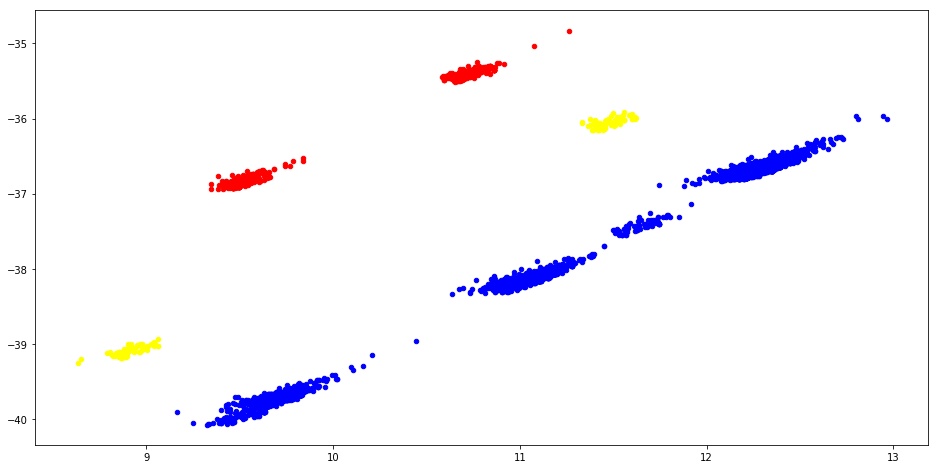

In [119]:
comps2 = pca.components_[0:2,:]
# project training data into two dimensions
Xtransformed = np.matmul(train_data, comps2.T)

plt.rcParams['figure.figsize'] = (16, 8)
# plot positive (poisonous) cases in blue and the negative (non-poisonous) in red
plt.scatter(Xtransformed[np.where(train_labels=='California'),0], 
            Xtransformed[np.where(train_labels=='California'),1], c='blue', s = 20)
plt.scatter(Xtransformed[np.where(train_labels=='New Mexico'),0], 
            Xtransformed[np.where(train_labels=='New Mexico'),1], c='red', s = 20)
plt.scatter(Xtransformed[np.where(train_labels=='Maine'),0], 
            Xtransformed[np.where(train_labels=='Maine'),1], c='yellow', s = 20)

** Note: We have removed standardized data for now. And we didn't remove 'sen_grade', 'rep_grade' (That's why PCA looks too good to be true). It helps with easier interpretation of n_killed in linear regression.

### Linear Regression Model: n_killed prediction using Linear Regression

What you will see below is a quick correlation table just to get a quick snapshot of which variables can and should not be used in the regression model. N_killed has a low correlation with almost all of the variables. We won't use n_injured in the model. 

In [120]:
df.corr()
# correlation of 'sen_grade', 'rep_grade' == 0.35, so it is ok to use them in same linear regression model. 
# Just checked to be sure it is not 1.

# n_killed has low correlation with almost all of the varibles.  will not use n_injured in the model.

,n_killed,n_injured,n_guns_involved,year,Accidents,Child,Defense,Domestic_Violence,Drug_Alcohol,Fight,...,Teen_Male_Victim,Teen_Male_SubjectSuspect,Teen_Female_Victim,Teen_Female_SubjectSuspect,Child_Male_Victim,Child_Male_SubjectSuspect,Child_Female_Victim,Child_Female_SubjectSuspect,sen_grade,rep_grade
n_killed,1.000000,-0.275855,0.020029,0.030649,0.000561,0.064163,0.077763,0.282750,0.069395,-0.045103,...,-0.009410,0.014632,0.039266,0.012694,0.072805,0.001578,0.098069,0.005030,0.057730,0.065735
n_injured,-0.275855,1.000000,-0.005381,0.059773,-0.020080,0.012671,-0.046425,-0.146822,-0.117193,0.093468,...,0.156437,-0.047049,0.098896,-0.015962,0.015259,-0.011523,0.023984,-0.001933,-0.080663,-0.146372
n_guns_involved,0.020029,-0.005381,1.000000,-0.127236,-0.028562,-0.021206,0.139057,-0.011718,0.050164,0.053836,...,-0.015139,0.025630,0.001131,-0.004390,0.001571,-0.005744,-0.005123,-0.004353,0.005860,0.002545
year,0.030649,0.059773,-0.127236,1.000000,-0.038856,0.040265,0.004480,0.047288,0.008422,0.070061,...,0.003297,-0.011054,-0.004191,0.002449,-0.029421,-0.015413,-0.010285,-0.006822,-0.008257,0.002074
Accidents,0.000561,-0.020080,-0.028562,-0.038856,1.000000,0.194783,-0.029572,-0.044229,-0.006140,-0.043795,...,0.057096,0.027739,0.026483,0.007725,0.125244,0.132506,0.049362,0.038730,0.044642,0.079427
Child,0.064163,0.012671,-0.021206,0.040265,0.194783,1.000000,-0.019038,0.021328,-0.017402,0.012687,...,-0.011051,0.004722,0.004791,0.000968,0.472447,0.320922,0.361067,0.095165,0.019641,0.011084
Defense,0.077763,-0.046425,0.139057,0.004480,-0.029572,-0.019038,1.000000,0.023167,0.008638,0.000677,...,-0.029342,0.017276,-0.015468,0.001316,-0.014366,-0.005000,-0.014266,-0.002638,0.055366,0.038053
Domestic_Violence,0.282750,-0.146822,-0.011718,0.047288,-0.044229,0.021328,0.023167,1.000000,-0.000982,-0.056807,...,-0.048102,-0.030273,0.008586,-0.001595,0.020733,-0.009908,0.036260,-0.003517,0.064777,0.097375
Drug_Alcohol,0.069395,-0.117193,0.050164,0.008422,-0.006140,-0.017402,0.008638,-0.000982,1.000000,-0.013563,...,-0.026748,0.024076,-0.008843,0.021265,-0.012235,-0.009547,-0.009758,-0.002978,0.017166,0.053920
Fight,-0.045103,0.093468,0.053836,0.070061,-0.043795,0.012687,0.000677,-0.056807,-0.013563,1.000000,...,0.046204,0.009609,0.022084,-0.001739,0.010986,-0.013572,0.019122,-0.001275,-0.023354,-0.020626


In [121]:
columns = ['n_guns_involved',
     'Accidents',
     'Child',
     'Defense',
     'Domestic_Violence',
     'Drug_Alcohol',
     'Fight',
     'Gang',
     'Ghost_gun',
     'Hate_crime',
     'Hostage',
     'Mass',
     'Murder',
     'Police',
     'Political_Violence',
     'Robbery',
     'School',
     'Sex_crime',
     'Social_gathering',
     'terrorism',
     'Adult_Male_SubjectSuspect',
     'Adult_Female_SubjectSuspect',
     'Teen_Male_SubjectSuspect',
     'Teen_Female_SubjectSuspect',
     'sen_grade',
     'rep_grade']
X = df[columns]
y = df['n_killed']

In [122]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               n_killed   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     689.3
Date:                Tue, 07 Aug 2018   Prob (F-statistic):               0.00
Time:                        11:43:38   Log-Likelihood:                -70008.
No. Observations:               98312   AIC:                         1.401e+05
Df Residuals:                   98285   BIC:                         1.403e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

So the variables having p-value(P>|t|) >0.05 are not statistically significantly different from zero.
Let's remove them and retrain the model.

In [123]:
columns2 = ['Accidents',
     'Child',
     'Defense',
     'Domestic_Violence',
     'Drug_Alcohol',
     'Fight',
     'Gang',
     'Hate_crime',
     'Mass',
     'Murder',
     'Police',
     'Robbery',
     'School',
     'Social_gathering',
     'terrorism',
     'Adult_Male_SubjectSuspect',
     'Teen_Male_SubjectSuspect',
     'Teen_Female_SubjectSuspect',
     'sen_grade',
     'rep_grade']
X = df[columns2]

In [124]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               n_killed   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     895.8
Date:                Tue, 07 Aug 2018   Prob (F-statistic):               0.00
Time:                        11:43:44   Log-Likelihood:                -70011.
No. Observations:               98312   AIC:                         1.401e+05
Df Residuals:                   98291   BIC:                         1.403e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Results: 
Having low impact of non-normalized variables like Adult_Male_SubjectSuspect,Teen_Male_SubjectSuspect, Teen_Female_SubjectSuspect, sen_grade, rep_grade (Other variables are 0 or 1), we can compare the importance of other variables by the size of their coefficients. Important things to note are having a terrorism event adds 1.1 extra n_killed. Other variables with significant or notable impact are: Mass - 0.85, Domestic_Violence - 0.55. Additionally, having a case of a Fight reduces the n_killed by 0.06.

While there are some indicators of how certain variables could affect the number of people killed, the model itself is pretty low in terms of accuracy, we only see values in the .15 range. 

### n_killed prediction using Random Forest

Let's try using the Random Forest method to see if there are any other findings that can be drawn to predict the number of people killed based on variables within the dataset. Let's start by looking through the importance of certain features. 

In [125]:
clf = RandomForestRegressor(random_state=0)
clf.fit(X, y)

fmt = '{:<4}{:<30}{}'
print(fmt.format('', 'Feature', 'Feature importance'))
for i, (name, grade) in enumerate(zip(columns2, clf.feature_importances_)):
    print(fmt.format(i, name, grade))

    Feature                       Feature importance
0   Accidents                     0.019566769599873555
1   Child                         0.02618572246684816
2   Defense                       0.02768373955016003
3   Domestic_Violence             0.24894231068580205
4   Drug_Alcohol                  0.03851574035162563
5   Fight                         0.0312046507247839
6   Gang                          0.024761803776682932
7   Hate_crime                    0.0032662025983163498
8   Mass                          0.09271868055146623
9   Murder                        0.022522336542291667
10  Police                        0.07488599117392265
11  Robbery                       0.03385946658483544
12  School                        0.0037495172389152226
13  Social_gathering              0.029252294785510308
14  terrorism                     0.002864121290636654
15  Adult_Male_SubjectSuspect     0.06965492829375494
16  Teen_Male_SubjectSuspect      0.024183870715807736
17  Teen_Female_Subj


Note that the output of importances in decision trees regressor is different from linear regression.

### MSE of Linear Regression VS RandomForestRegressor

**Note: We will not fine tune the RandomForestRegressor on train data, because we only want to use test data and no validation data. We will be using default parameters. 

In [126]:
from sklearn.metrics import mean_squared_error as mse

In [127]:
# splitting data to train/test
train_x = df[:85000]
train_y = df[:85000]
train_x = train_x[columns2]
train_y = train_y['n_killed']

test_x = df[85000:]
test_y = df[85000:]
test_x = test_x[columns2]
test_y = test_y['n_killed']

In [128]:
# fitting linear regression and calculating the MSE on test data 
lm = LinearRegression(normalize=True)
lm.fit(train_x, train_y)
predictions_lm = lm.predict(test_x)
mse_lm = mse(test_y, predictions_lm)
print('Linear Regression MSE of test data predictions: ' + str(mse_lm))

# fitting random forest and calculating the MSE on test data
rf = RandomForestRegressor(max_depth = 5, random_state=0)
rf.fit(train_x, train_y)
predictions_rf = rf.predict(test_x)
mse_rf = mse(test_y, predictions_rf)
print('Random Forest MSE of test data predictions: ' + str(mse_rf))

Linear Regression MSE of test data predictions: 0.2458862118082969
Random Forest MSE of test data predictions: 0.24121221606553064


#### Results: 
Utilizing the linear regression or a Random Forest to predict casualties/deaths is not that effective as seen in the accuracy values of roughly .25 for each type. Let's move on to the next model.

## Machine learning Model 3: Predicting mass events


In [2]:
# A mass shooting is defined as three or more people being shot. Create a new variable that adds together the number of people
# killed and injured to determine the number of people shot total in each incident

train_data_model3 = pd.read_csv("gun_violence_train.csv", parse_dates=["date"], encoding = 'latin1')
test_data_model3 = pd.read_csv("gun_violence_test.csv", parse_dates=['date'], encoding = 'latin1')
train_data_model3.reset_index(drop = True, inplace = True)
test_data_model3.reset_index(drop = True, inplace = True)


train_data_model3['n_shot'] = train_data_model3['n_killed'] + train_data_model3['n_injured']
test_data_model3['n_shot'] = test_data_model3['n_killed'] + test_data_model3['n_injured']

# Create a binary variable for if the event was a mass shooting to use as labels

train_labels_model3 = []
train_labels_model3 = [1 if train_data_model3['n_shot'].iloc[event] >= 3 else 0 for 
                       event in range(0,len(train_data_model3['n_shot']))]

test_labels_model3 = []
test_labels_model3 = [1 if test_data_model3['n_shot'].iloc[event] >= 3 else 0 for 
                      event in range(0, len(test_data_model3['n_shot']))]

In [5]:
# Calculating the number of gun violence incidents of interests per capita
# First creating a table of the number of incidents for each state

state_freq = pd.DataFrame(df['state'].value_counts())
state_freq.columns = ['Number of Incidents']
state_freq.reset_index(inplace = True)
state_freq.columns = ['State', 'Number of Incidents']

# Reading in the population data for each state from the 2010 census
state_pop = pd.read_csv('Census Data State Populations.csv')
# Setting the index to the state names, so that the look up is easier
state_pop.set_index('State', inplace = True)

# Calculating the incidents per capita and adding to the table

incidents_per_capita = []
for i in range(0, len(state_freq)):
    state = state_freq.iloc[i]['State']
    incidents_per_capita.append(state_freq.iloc[i]['Number of Incidents']/state_pop.loc[state]['Population'])
incidents_per_capita = pd.DataFrame(incidents_per_capita)
state_freq = pd.concat([state_freq, incidents_per_capita], axis = 1)
state_freq.columns = ['State', 'Number of Incidents', 'Incidents per Capita']
# Writing these values to csv
state_freq.to_csv("Incidents_per_Capita.csv")

# Adding the incidents per capita (state level data) to the dataframe

train_data_model3['inc_per_capita'] = np.nan
train_data_model3['inc_per_capita'] = [state_freq['Incidents per Capita'].loc[state_freq['State'] == state].values[0] for state in train_data_model3['state']]


test_data_model3['inc_per_capita'] = np.nan
test_data_model3['inc_per_capita'] = [state_freq['Incidents per Capita'].loc[state_freq['State'] == state].values[0] for state in test_data_model3['state']]


# Removing NaN values from the data set, replace with the mean value

for feature in ['n_guns_involved', 'sen_grade', 'rep_grade']:
    train_data_model3[feature] = [np.mean(train_data_model3[feature]) if np.isnan(train_data_model3.loc[event, feature]) else train_data_model3.loc[event, feature] for event in range(0, len(train_data_model3[feature]))]
    test_data_model3[feature] = [np.mean(test_data_model3[feature]) if np.isnan(test_data_model3.loc[event, feature]) else test_data_model3.loc[event, feature] for event in range(0, len(test_data_model3))]

# Create binary features of the Victim and Suspect categories

binary_features = ['Adult_Male_Victim', 'Adult_Male_SubjectSuspect', 'Adult_Female_Victim', 'Adult_Female_SubjectSuspect', 
                   'Teen_Male_Victim', 'Teen_Male_SubjectSuspect', 'Teen_Female_Victim', 'Teen_Female_SubjectSuspect', 
                   'Child_Male_Victim', 'Child_Male_SubjectSuspect', 'Child_Female_Victim', 'Child_Female_SubjectSuspect']

for feature in binary_features:
    test_data_model3[feature] = [1 if test_data_model3.loc[event, feature] > 0 else 0 for event in range(0, len(test_data_model3))]
    train_data_model3[feature] = [1 if train_data_model3.loc[event, feature] > 0 else 0 for event in range(0, len(train_data_model3))]

In [6]:
# Run a logistic regression on the idea of a mass shooting to look for important factors involved in the incident

log_features = ['n_guns_involved', 'Accidents', 'Child', 'Defense',
       'Domestic_Violence', 'Drug_Alcohol', 'Fight', 'Gang', 'Ghost_gun',
       'Hate_crime', 'Hostage', 'Murder', 'Police',
       'Political_Violence', 'Robbery', 'School', 'Sex_crime',
       'Social_gathering', 'terrorism', 'Adult_Male_SubjectSuspect', 'Adult_Female_SubjectSuspect',
       'Teen_Male_SubjectSuspect', 'Teen_Female_SubjectSuspect', 'Child_Male_SubjectSuspect',
       'Child_Female_SubjectSuspect', 'sen_grade', 'rep_grade', 'inc_per_capita']

log_data = train_data_model3[log_features]
log_data.reset_index(drop = True, inplace = True)
log_data.head()

log_test = test_data_model3[log_features]

log_model = LogisticRegression(penalty='l2', C = 0.2)
log_model.fit(log_data, train_labels_model3)
coefs = log_model.coef_

model_results = pd.DataFrame(coefs[0], log_features)
model_results.reset_index(drop = False, inplace = True)
model_results.columns = ['Features', 'Coefficients']
model_results['Odds Ratio'] = np.exp(model_results['Coefficients'])
print(model_results.sort_values(by = ['Odds Ratio'], ascending = False))
print('`````````````````````````````````````````````````````````')

log_pred = log_model.predict(log_test)
test_f1 = metrics.f1_score(test_labels_model3, log_pred, average = "weighted")
print("F1 score: ", test_f1)
print("Accuracy: ", log_model.score(log_test, test_labels_model3))

                       Features  Coefficients  Odds Ratio
2                         Child      1.673477    5.330671
11                       Murder      1.300376    3.670676
17             Social_gathering      1.278586    3.591559
9                    Hate_crime      1.080098    2.944969
7                          Gang      0.695743    2.005198
6                         Fight      0.675669    1.965348
4             Domestic_Violence      0.667206    1.948784
15                       School      0.585573    1.796020
3                       Defense      0.348482    1.416915
18                    terrorism      0.346885    1.414655
13           Political_Violence      0.293256    1.340786
21     Teen_Male_SubjectSuspect      0.127471    1.135951
24  Child_Female_SubjectSuspect      0.117975    1.125216
8                     Ghost_gun      0.110792    1.117162
10                      Hostage      0.100497    1.105720
0               n_guns_involved      0.066875    1.069162
5             

#### Results:

The logistic regression model has a high accuracy score (96%) and provides insights to the occurence of mass shootings. We define a mass shooting as an incident where three or more people are shot (injured or killed). We included 28 features including the categories of shootings we defined earlier, the number of guns involved, the type of suspect, the NRA grades for the US Senators and Representatives of the incident, as well as the number of incidents per capita. Looking at the odds ratios for the features there are several values that support our model, including that if an incident is designated as an accident then the probability that a mass shooting occurs 0.12 times less likely than if the incident is not an accident (accidents rarely end up shooting three or more people). We also see that mass shootings are more likely to occur if the incident is classified as murder and if the incident occurs at a social gathering. 

Most of the categories do not strongly affect the likelihood of a mass shooting incident, though some clearly do. If a child is present (if the Child category has a value of 1), then a mass shooting is 5.3 times more likely than if the child is not present. If an incident is a hate crime, then it is 3 times more likely to be a mass shooting than if it is not a hate crime. Additionally, domestic violence, fights, gangs, and school shootings each double the likelihood of a mass shooting. This could provide a course of action for what areas we should focus on if we want to lessen the number of mass shootings that occur.
It is also interesting to note some of the factors that do not affect the likelihood of a mass shooting, namely the NRA grades for the elected officials and the number of incidents per capita. The lack of affect of the attitudes of the elected officials indicates that the elected officials are not able to combat the issue and also that the locations of mass shootings are not correlated with the attitude of the voters towards guns. Additionally, the lack of correlation between the number of incidents per capita with the likelihood of a mass shooting suggests that there mass shootings do not happen in areas with more gun violence in general. From this, we conclude that the mass shootings happen in random locations and that the attitudes of the voters and the actions of the federal politicians are not translating into reductions in mass shootings, yet.

There is a strange affect when looking at the suspects. Most types of suspects reduce the likelihood of a mass shootings, except teen males and child females. Based on the news, the increased likelihood of teen males as suspects is not surprising, especially considering the increased likelihood of mass shootings at schools. However, it seems unlikely that female children are engaging in a lot of mass shootings, and indicates that our model may be missing something.